# Generando una nube de palabras sobre los títulos

In [24]:
import csv
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [25]:
all_titles = ''
titles = "data/titles.csv"

with open(titles, mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    for row in reader:
        all_titles += row[0].lower() + ' '

all_titles

'how to learn online programming for everybody (getting started with python) cs50\'s introduction to computer science the analytics edge marketing analytics: marketing measurement strategy introduction to project management leading high-performing teams the foundations of happiness at work managing study, stress and mental health at university six sigma: define and measure fat chance: probability from the ground up chasing your\xa0dream: how to end procrastination and get a job you love bitcoin and cryptocurrencies english grammar and style ethics in action introduction to fintech data science: r basics python basics for data science the science of beer strategic social media marketing cs50\'s introduction to artificial intelligence with python cs50\'s introduction to game development rhetoric: the art of persuasive writing and public speaking cs50\'s web programming with python and javascript contract law: from trust to promise to contract fundamentals of neuroscience, part 1: the ele

In [26]:
# Descargamos las stopwords para español e inglés
nltk.download('stopwords')

stopwords_es = set(stopwords.words('spanish'))

stopwords_en = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/hugo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
# Combinar las stopwords en ambos idiomas, y también las STOPWORDS que vienen en wordcloud y otras que no aportan a la nube
stopwords_combined = stopwords_es.union(stopwords_en).union(STOPWORDS).union(['beginners', 'basic', 'introduction', 'course', 'create', 'learn', 'learning', 'build', 'complete', 'using', 'complete', 'scratch','guide', 'Using', 'Basics', 'Project', 'Master', 'Play', 'Beginner', 'Advanced', 'Make', 'Fundamental', 'step', 'option', 'part', 'level', 'hour', 'building', 'projects', 'aprende', 'essential', 'fundamentals', 'mastering', 'stock', 'trade', 'tutorial', 'professional'])

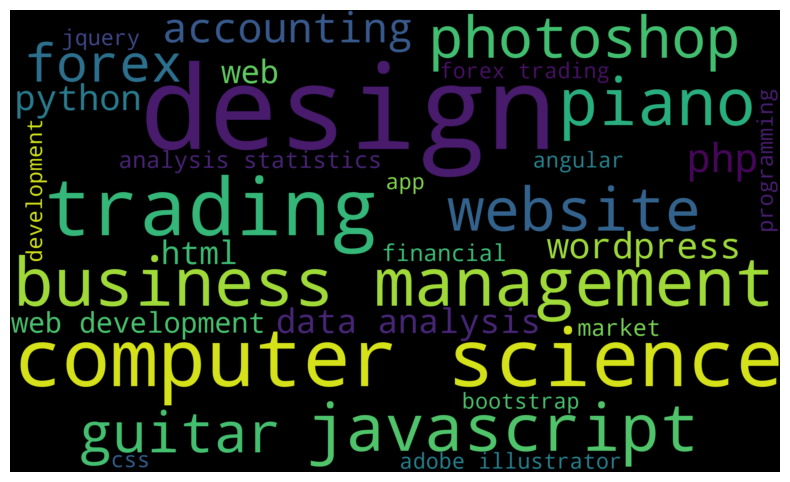

In [49]:
wordcloud = WordCloud(
    stopwords=stopwords_combined,
    width=1000,
    height=600,
    max_words=30,
    scale=2
    )

wordcloud.generate_from_text(all_titles)

# Mostrar el word cloud en una figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [50]:
wordcloud.to_file('src/wordcloud.png')